# **Task 3**

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# Read in and show data
data = pd.read_csv("./data/task_3.csv")
display(data)

,recording_date,CONTRAST_SNR,ENERGY_SNR
0,2024-01-01,8.559622,5.949605
1,2024-01-01,7.096034,5.587822
2,2024-01-02,8.805378,5.875664
3,2024-01-02,6.327582,5.627211
4,2024-01-03,9.954038,6.524691
...,...,...,...
159,2024-05-13,6.962880,6.697029
160,2024-05-14,9.292106,5.667969
161,2024-05-14,9.450723,5.959876
162,2024-05-15,8.323920,6.452920


In [3]:
# Get data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recording_date  164 non-null    object 
 1   CONTRAST_SNR    164 non-null    float64
 2   ENERGY_SNR      164 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB
None


In [4]:
# Get general statistics
statistics = data[['CONTRAST_SNR', 'ENERGY_SNR']].describe()
print(statistics)

       CONTRAST_SNR  ENERGY_SNR
count    164.000000  164.000000
mean       8.285099    6.514215
std        1.107038    0.669123
min        5.263380    5.269375
25%        7.661486    6.025049
50%        8.654731    6.470389
75%        9.032052    6.814487
max       10.135375    9.305865


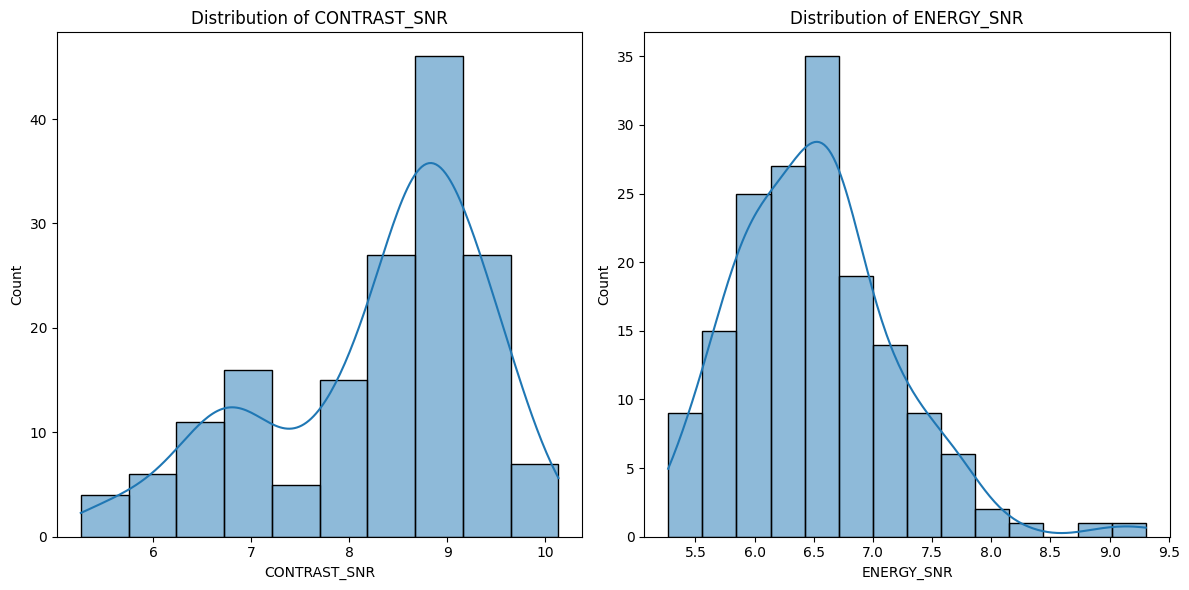

In [5]:
# Histograms
plt.figure(figsize=(12, 6))

# CONTRAST_SNR
plt.subplot(1, 2, 1)
sns.histplot(data['CONTRAST_SNR'], kde=True)
plt.title('Distribution of CONTRAST_SNR')

# ENERGY_SNR
plt.subplot(1, 2, 2)
sns.histplot(data['ENERGY_SNR'], kde=True)
plt.title('Distribution of ENERGY_SNR')

plt.tight_layout()
plt.show()

There is a very strong inverse relationship between the values of CONTRAST_SNR and ENERGY_SNR distribution wise. CONTRAST_SNR is moderately skewed to the right, and almost completely vice versa, ENERGY_SNR is skewed moderately to the left. Overall, the pattern of the distribution is very similar if translated accross the y-axis to take the skew into consideration. 

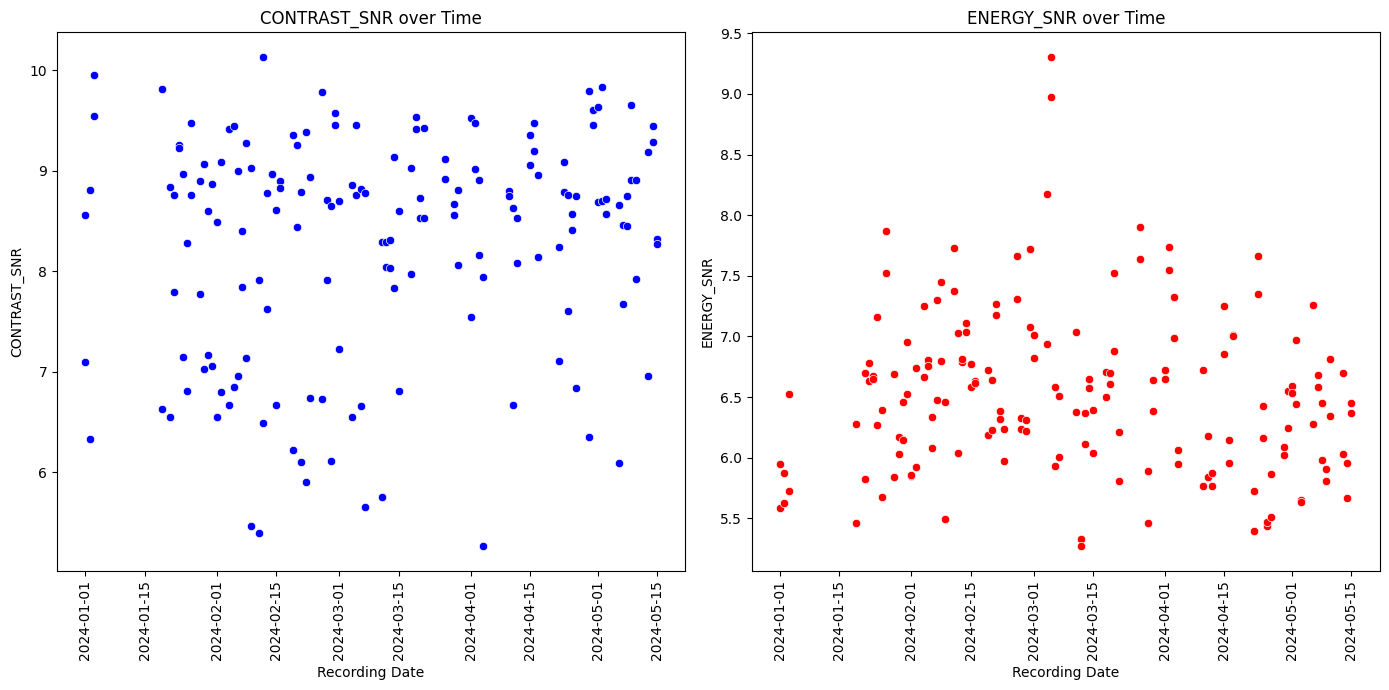

In [6]:
# Convert time to usable format
data['recording_date'] = pd.to_datetime(data['recording_date'])

# Scatter plots
plt.figure(figsize=(14, 7))

# CONTRAST_SNR
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='recording_date', y='CONTRAST_SNR', color='blue')
plt.title('CONTRAST_SNR over Time')
plt.xlabel('Recording Date')
plt.ylabel('CONTRAST_SNR')
plt.xticks(rotation=90)

# ENERGY_SNR
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='recording_date', y='ENERGY_SNR', color='red')
plt.title('ENERGY_SNR over Time')
plt.xlabel('Recording Date')
plt.ylabel('ENERGY_SNR')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

While there is no explicitly identifiable pattern, overall CONTRAST_SNR seems to cluster in the higher part of the chart, between 8-10 while ENERGY_SNR seemt to inversely cluster on the lower half of the chart between 5.5-7.5.

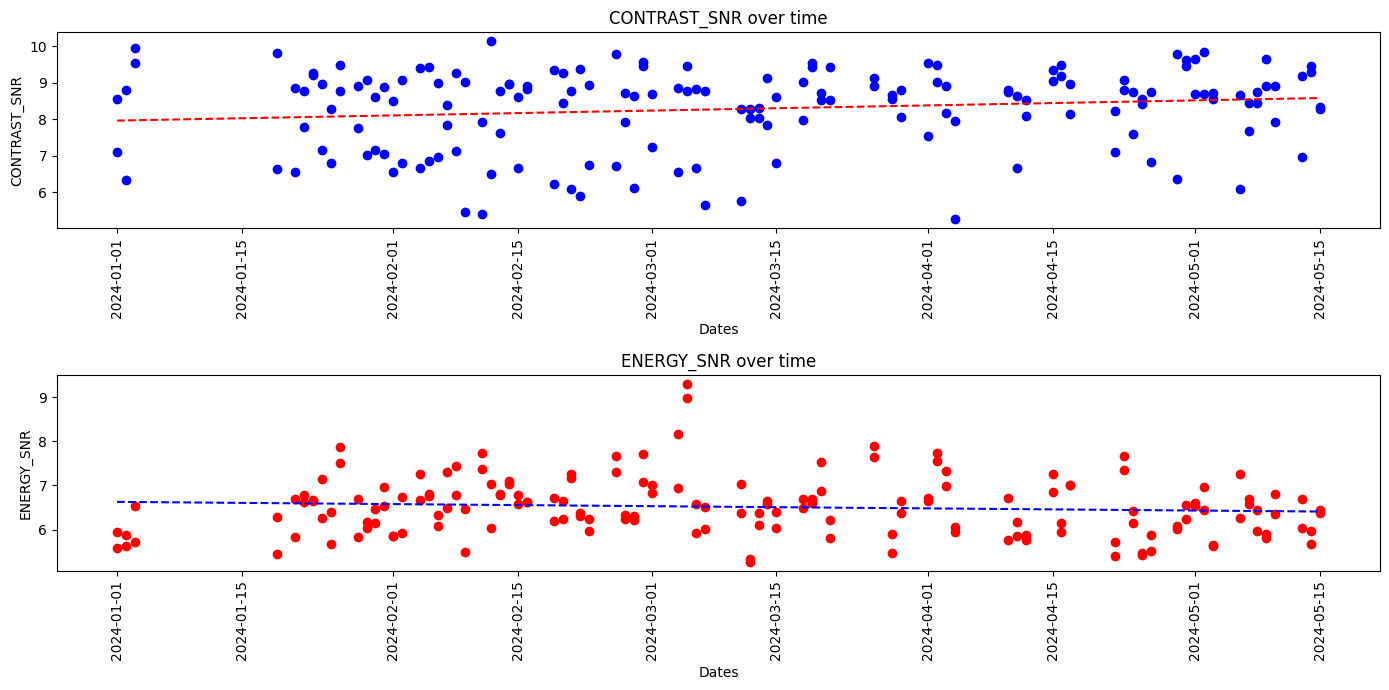

In [7]:
# Time series regression plots
plt.figure(figsize=(14, 7))

# Convert dates to ordinal format for regression
copy = data.copy()
copy['recording_date'] = pd.to_datetime(copy['recording_date'])
copy['date'] = copy['recording_date'].map(pd.Timestamp.toordinal)

# Prepare data for regression
X = copy[['date']]
y_contrast = copy['CONTRAST_SNR']
model = LinearRegression()
model.fit(X, y_contrast)
y_contrast_pred = model.predict(X)

# CONTRAST_SNR
plt.subplot(2, 1, 1)
plt.scatter(copy['recording_date'], y_contrast, marker='o', linestyle='-', color='blue')
plt.plot(copy['recording_date'], y_contrast_pred, color='red', linestyle='--', label='Regression Line')
plt.title('CONTRAST_SNR over time')
plt.xlabel('Dates')
plt.ylabel('CONTRAST_SNR')
plt.xticks(rotation=90)

# ENERGY_SNR
y_energy = copy['ENERGY_SNR']
model.fit(X, y_energy)
y_contrast_pred = model.predict(X)
plt.subplot(2, 1, 2)
plt.scatter(copy['recording_date'], y_energy, marker='o', linestyle='-', color='red')
plt.plot(copy['recording_date'], y_contrast_pred, color='blue', linestyle='--', label='Regression Line')
plt.title('CONTRAST_SNR over time')
plt.title('ENERGY_SNR over time')
plt.xlabel('Dates')
plt.ylabel('ENERGY_SNR')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

According to these time series graphs, there seems to be little if any relationship between time and ENERGY_SNR or CONTRAST_SNR. There is a slight increase in CONTRAST_SNR over time and an inversely slight decrease in ENERGY_SNR over time.

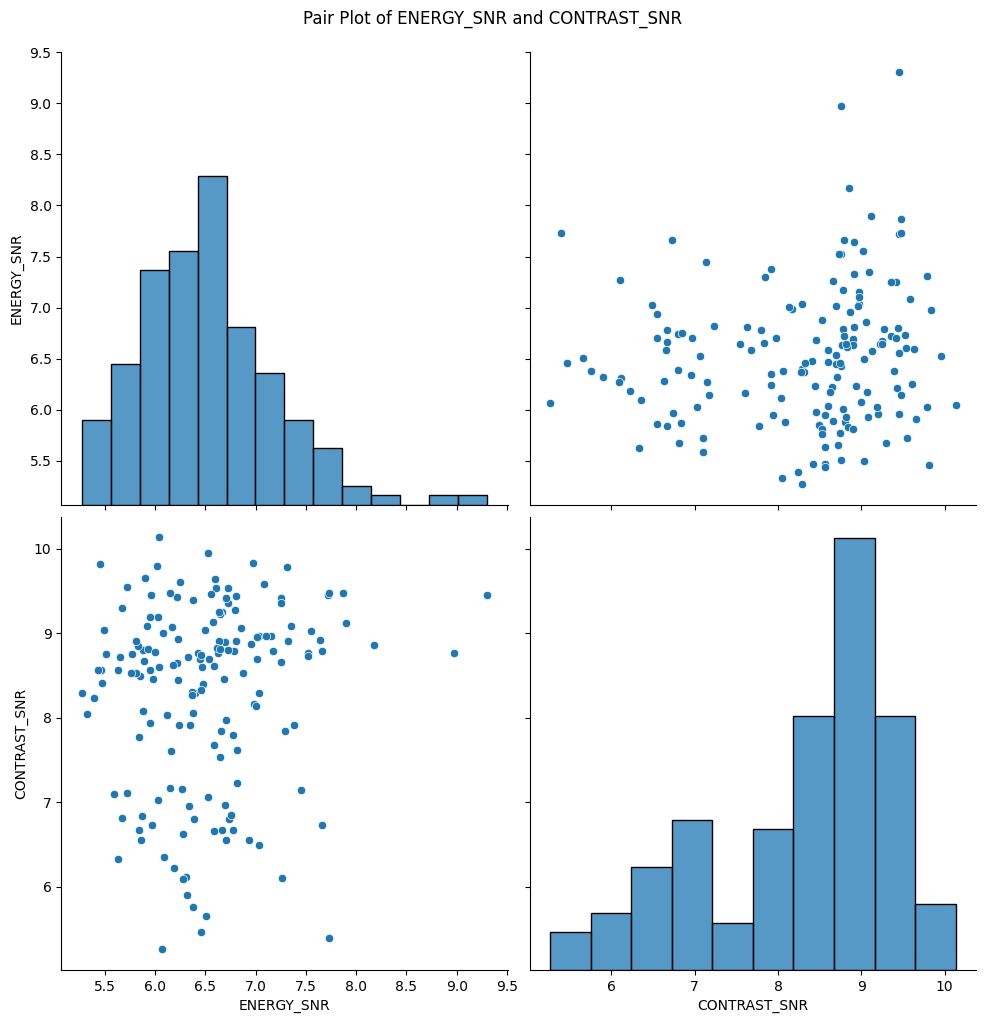

In [8]:
sns.pairplot(data[['ENERGY_SNR', 'CONTRAST_SNR']], height=5)
plt.suptitle('Pair Plot of ENERGY_SNR and CONTRAST_SNR', y=1.02)
plt.show()

On the basis of both the scatter plots, time series regression, and histograms, the inverse nature of the relationship between CONTRAST_SNR and ENERGY_SNR is only reinforced. 

                recording_date  CONTRAST_SNR  ENERGY_SNR
recording_date        1.000000      0.155556   -0.091322
CONTRAST_SNR          0.155556      1.000000    0.108071
ENERGY_SNR           -0.091322      0.108071    1.000000


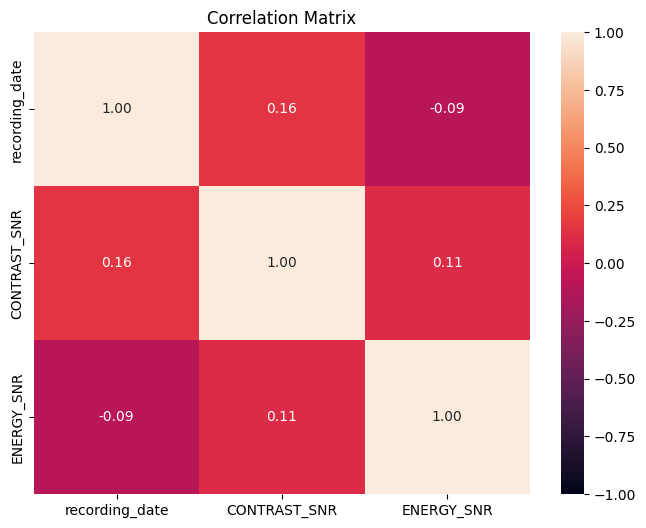

In [9]:
matrix = data.corr()
print(matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

All the correlations in the correlation matrix are relatively weak, suggesting that there is almost no linear relationship between the variables. CONTRAST_SNR has a slight positive trend overtime, and following the general pattern of being the inverse, ENERGY_SNR has a slight negative trend over time. 

Overall, looking at the patterns throughout the data, the inverse relationship between ENERGY_SNR and CONTRAST_SNR is explicit. The fact that the data is clustered and that the correlation matrix scored so low, implies that linear models would not perform well on this data. The data reminds me of a kernel space with a soft non-linear boundary line. 

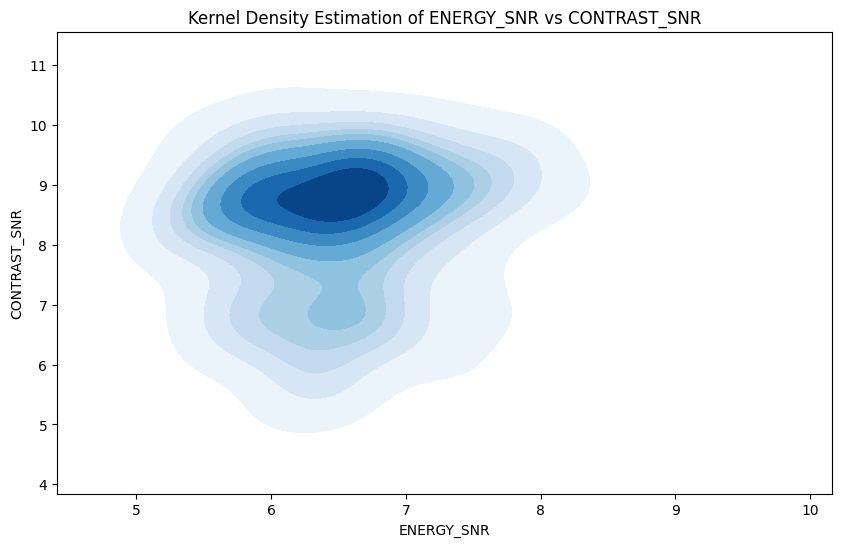

In [10]:
# Kernel Density Estimation plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='ENERGY_SNR', y='CONTRAST_SNR', cmap='Blues', fill=True)

plt.title('Kernel Density Estimation of ENERGY_SNR vs CONTRAST_SNR')
plt.xlabel('ENERGY_SNR')
plt.ylabel('CONTRAST_SNR')
plt.show()